In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 2: Statistics (DSFS Chapter 5)

* **Mean and median: Explain the difference between the mean and the median in your own words. In what kinds of dataset are the mean and median similar? Can you think of a dataset where the mean and median would be very different?**

The mean is measuring the average value of all observations while the median is measuring the "middle" of our dataset (collection of observations). The mean and median are similar for datasets that are "evenly spread" and without many outliers (as outliers can significantly "pull" the mean in one direction, while affecting the median to a much lesser extent).

Therefore, datasets taht have a number of outliers lead the mean and median to being quite different.

* **Variance: Explain the variance in your own words.**

Variance is a measure of how how "spread out" the data is. It other words, it measure on average how far observations deviate from the mean. The variance can be calculated according to (assuming a uniform distribution):

$Var(X) = \frac{1}{N} \times \sum_{n=1}^{N} (x_n - \mu)^2$

Therefor if all observations lie close to the mean, the variance is not very high. If however there are quite a few observations that deviate from the mean, the variacne will be higher.

* **A paradox: What is Simpson's Paradox. Provide your own example of a dataset where this issue occurs.**

THe Simpson's paradox refers to a phenomenom where a trend appears in different groups of data but disappears or reverses when these groups are combined. A classical example is the admission rate to University of Berkeley’s graduate schools. In that if we look at the total admission rates is shows 44% admission rate for men and a 35% admission rate for women. This indicates that men are favored in the admission process over women.

However, the paradox stems from the fact that we are pooling groups from different departments and treating them as one. Looking at the admission rates by department, one can see that women tended to apply for departments that are very competitive, while men applied for departments which were "easier" to get into. If we pool all the men and women together as two groups, we lose the information that women were applying for more difficult departments, and we only get the acceptance rate.

Looking at each department separately, it shows that women are actually slightly favored over men in the admission process.

* **Correlation and causation: Explain what's funny about this comic.**

The comic is talking about a classic fallacy wherein it is assumed that there is a causal relationship between two events because they correlate together. An example of such a fallacy is saying that *"The sun comes up after the rooster crows, therefore the rooster crowing causes the sun come up"*.

In [2]:
import numpy as np
import urllib2
from StringIO import StringIO

**Downloading the datasets**

In [3]:
data_dict = {}

for number in range(1,5):
    
    data_file = "data_file" + str(number)
    
    current_response = urllib2.urlopen('https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data{}.tsv'.format(number))
    current_array = np.genfromtxt(StringIO(current_response.read()), delimiter='\t')
    
    
    data_dict["Array {}".format(number)] = current_array

**Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset.**

**Use python string formatting to print precisely two decimal places of these results to the output cell.**

In [4]:
for key, value in data_dict.items():
    
    all_means = np.mean(data_dict[key], axis=0)
    current_x_mean, current_y_mean = all_means[0], all_means[1]
    print("The mean values of x and y in {} are {:.2f} and {:.2f} respectively.".format(key, current_x_mean, current_y_mean))
    

The mean values of x and y in Array 1 are 9.00 and 7.50 respectively.
The mean values of x and y in Array 2 are 9.00 and 7.50 respectively.
The mean values of x and y in Array 3 are 9.00 and 7.50 respectively.
The mean values of x and y in Array 4 are 9.00 and 7.50 respectively.


**Now calculate the variance for all of the various sets of x- and y-values (to three decimal places).**

In [5]:
for key, value in data_dict.items():
    
    all_var = np.var(data_dict[key], axis=0)
    current_x_var, current_y_var = all_var[0], all_var[1]
    print("The variance values of x and y in {} are {:.3f} and {:.3f} respectively.".format(key, current_x_var, current_y_var))
    

The variance values of x and y in Array 1 are 10.000 and 3.752 respectively.
The variance values of x and y in Array 2 are 10.000 and 3.752 respectively.
The variance values of x and y in Array 3 are 10.000 and 3.748 respectively.
The variance values of x and y in Array 4 are 10.000 and 3.748 respectively.


**Use numpy to calculate the Pearson correlation between x- and y-values for all four data sets (also to three decimal places)**

In [6]:
for key, value in data_dict.items():
    
    x = data_dict[key][:,0]
    y = data_dict[key][:,1]
    pearsons_cof = np.corrcoef(x, y)
    print("The Pearsons Correlation coefficient for {} is {:.3f}".format(key, pearsons_cof[0,1]))
    

The Pearsons Correlation coefficient for Array 1 is 0.816
The Pearsons Correlation coefficient for Array 2 is 0.816
The Pearsons Correlation coefficient for Array 3 is 0.816
The Pearsons Correlation coefficient for Array 4 is 0.817


**The next step is use linear regression to fit a straight line f(x)=ax+b through each dataset and report a and b (to two decimal places).**

In [7]:
from scipy import stats

for key, value in data_dict.items():
    
    x = data_dict[key][:,0]
    y = data_dict[key][:,1]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    print("The linear equation describing {} is y = {:.2f}x + {:.2f}".format(key, slope, intercept))
    

The linear equation describing Array 1 is y = 0.50x + 3.00
The linear equation describing Array 2 is y = 0.50x + 3.00
The linear equation describing Array 3 is y = 0.50x + 3.00
The linear equation describing Array 4 is y = 0.50x + 3.00


Finally, it's time to plot the four datasets using `matplotlib.pyplot`.

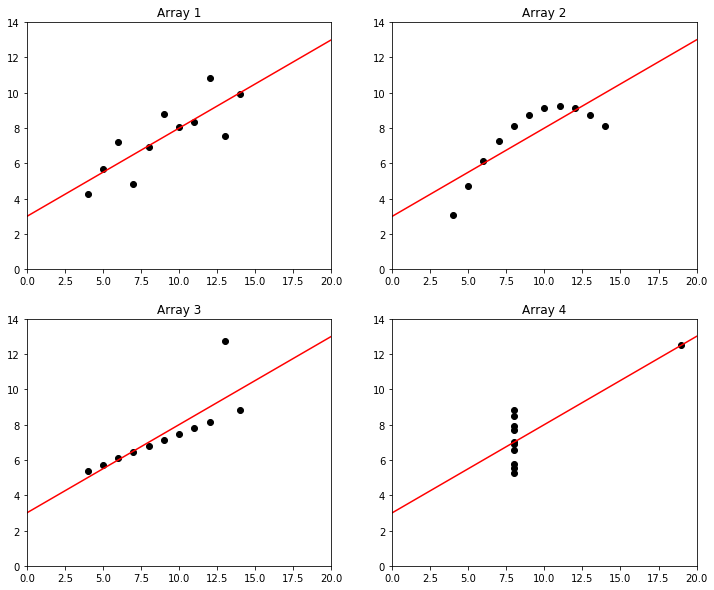

In [8]:
subplot_counter = 1

plt.figure(figsize=(12,10)) # size must be defined before plotting

for key, value in data_dict.items():
    
    # Calculate values
    x = data_dict[key][:,0]
    y = data_dict[key][:,1]
    m, b = np.polyfit(x, y, 1) # fit a 1 degree polynomial 
    regression_line_limits = np.array([0,20]) # limits to extend regression lines
    
    # Plotting
    plt.subplot(2, 2, subplot_counter)
    plt.scatter(x, y, c='black') # plot the data
    plt.plot(regression_line_limits, m*regression_line_limits + b, '-', c="r") # plot the regression line
    plt.xlim(0,20)
    plt.ylim(0,14)
    plt.title(key)
    
    subplot_counter += 1

plt.show()

**Explain - in your own words - what you think my point with this exercise is**

The point of this exercise is to show how basic statistic properties can sometimes do a poor job at describing datasets. Looking at properties such as the mean, variance, Person's coefficent and the linear equations describing the data could lead one to conclude that the datasets are all the same or the very least extremely similar.

However, it isn't until we actually plot our data that we see that the datasets are in fact very different from each other. This emphasizes the importance of visualizing the data we are analyzing.

## Part 3: Probability (DSFS Chapter 6)

* What is the probability of three girls?
* What is the probability of two girls and one boy?
* What is the probability of one girl and two boys?
* What is the probability of three boys?
* What is the probability that all children are girls given that the oldest child is a girl?
* What is the probability that all children are girls given that one of the children is a girl?

In [9]:
import random
from __future__ import division
from collections import Counter

def random_kid():
    return random.choice(["boy", "girl"])

n_trials = 10000

all_girls = 0
two_girls_one_boy = 0
oldest_girl = 0
any_girl = 0

random.seed(0)
for _ in range(n_trials):
    
    younger, middle, older = random_kid(), random_kid(), random_kid()
    
    kid_count = dict(Counter([younger, middle, older]))
    
    if kid_count == {'girl': 3}:
        all_girls += 1
    
    if kid_count == {'girl': 2, 'boy': 1}:
        two_girls_one_boy += 1
    
    if older == 'girl':
        oldest_girl += 1
        
    if 'girl' in kid_count:
        any_girl += 1

        
print "p(G, G, G):", all_girls / n_trials  
print "p(G, G, B):", two_girls_one_boy / n_trials  
print "p(G, B, B):", two_girls_one_boy / n_trials  # same probability as for two girls one boy
print "p(B, B, B):", all_girls / n_trials # same probability as for 3 girls

print "p(G, G, G | older = G):", round(all_girls / oldest_girl, 4) # same probability as for 3 girls
print "p(G, G, G | any = G):", round(all_girls / any_girl, 4) # same probability as for 3 girls

p(G, G, G): 0.1249
p(G, G, B): 0.3782
p(G, B, B): 0.3782
p(B, B, B): 0.1249
p(G, G, G | older = G): 0.246
p(G, G, G | any = G): 0.1419


* Work out the expected answer using your math skills.

$p(G, G, G) = p(G)^3 = (\frac{1}{2})^3 = \frac{1}{8}$

$p(G, G, B) = 3 \times \frac{1}{8} = \frac{1}{8}$ (since there are 3 ways to to order a set of 3 elements with 2 unique values)

$p(G, B, B) = 3 \times \frac{1}{8} = \frac{1}{8}$

$p(B, B, B) = p(B)^3 = (\frac{1}{2})^3 = \frac{1}{8}$

$p(G, G, G \mid older = G)  = \frac{p(G, G, G)}{p(older = G)} = \frac{1/8}{1/2} = \frac{1}{4}$ 

$p(G, G, G \mid any = G)  = \frac{p(G, G, G)}{p(any = G)} = \frac{1/8}{1 - p(all = B)} = \frac{1/8}{1 - 1/8} = \frac{1}{7}$ 

* Use Python's random module to simulate rolling a fair six-sided die 10 000 000 times.

In [10]:
import random

dice_throws = [random.randint(1,6) for throw in range(10000000)]

* Plot the distribution of dice rolls using a bar-chart. Hint: Use counter (see p. 24) to bin the values, then go back to Chapter 3 for examples of how to plot bar-charts (or try Google → stackoverflow).

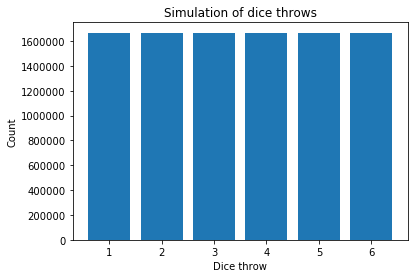

In [11]:
from collections import Counter

labels, values = zip(*Counter(dice_throws).items()) # * to unpack the tuples

plt.bar(labels, values)
plt.title("Simulation of dice throws")
plt.xlabel("Dice throw")
plt.ylabel("Count")
plt.show()

* Describe the shape of the distribution.

The shape of the distribution is a uniform shape as there is an equal probabilty of getting each value of the dice throws.

* Now perform a new simulation. Roll a fair six-sided die 10 times and take the average. Do that 1 000 000 times.

In [12]:
def generate_mean():
    
    total = [np.random.randint(1,7) for throw in range(10)] # using np here as it is faster
    
    return np.sum(total)/10


mean_dice_throws = [generate_mean() for n_trows in range(1000000)]

* Plot the distribution of those average values. This time you can't use counter (since the averages are not integer values).
* Instead use numpy.histogram to bin those number into 25 bins.
* What does the numpy.histogram function return? Do the two arrays have the same length?
* Then let's use matplotlib.pyplot.bar to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

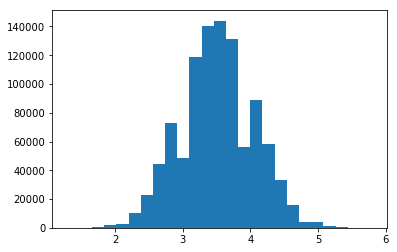

In [13]:
# With plt.hist
plt.hist(mean_dice_throws, bins=25)  # plt.hist passes it's arguments to np.histogram
plt.show()

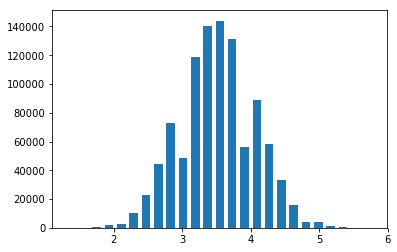

In [14]:
# Also possible with np.histogram and plt.bar
hist, bins = np.histogram(mean_dice_throws, bins=25) # hist = height for eac column
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2 # bin edges for the x-axis, a function of bins 
plt.bar(center, hist, align='center', width=width)
plt.show()

* Describe the shape of this distribution. Explain in your own words what happened to that flat distribution of die-rolls to suddenly make it Gaussian just by taking some averages.

The same of this distribution strongly resembles the normal distribution. The reason why taking the means of samples drawn from a uniform distribution is normal distributed is due to the Central Limit Theorem (CLT). The CLT states that for a given distribution with a mean $\mu$ and standard deviation $\sigma$, the sampling distribution will resemble a normal distribution with a mean of $\mu$ and a standard deviation of $\sigma/\sqrt{N}$. Therefore as the sample size increases, the variance (and standard deviation) decreases.

* Calculate the mean μ and standard deviation σ observed of the averaged values. Could you have predicted these values by reading DSFS pp. 78-80?

Since the CLT states that:

$\mu_{\bar{x}} = \mu$

where $\mu_{\bar{x}}$ is the mean of sample means and $\mu$ is the population meal. Additionally, the theorem states that:

$\sigma_{\bar{x}} = \frac{\sigma}{n^{1/2}}$

where $\sigma_{\bar{x}}$ is the standard deviation of the sample means and $\sigma$ is the standard deviation of the population.

Calculating the values for $\mu$ and $\sigma$ we get 3.5 and 1.71 respectively.

Calulating the values for $\mu_{\bar{x}}$ and $\sigma_{\bar{x}}$ we get:

In [15]:
print(np.mean(mean_dice_throws), np.std(mean_dice_throws))

(3.5012127000000017, 0.53967488301634881)


where $\frac{\sigma}{n^{1/2}} = \frac{1.71}{10^{1/2}} = 0.54$. Therefore, the equations derived from the CTL agree with our experiment of simulated dice throws.

## Part 4: Hypothesis and inference (DSFS Chapter 7)

* What's the null hypothesis when testing if a coin is fair?

When testing if a coin is fair, we have the following hypotheses:

$H_0: p = 0.5$

$H_1: p \neq 0.5$

In this case, our null hypothesis is that the coin is fer an the alternative hypothesis is that it is not fair. If we cannot reject the null hypothesis, we can assume that the coin is fair.

* Explain in your own words what Joel means by significance on p. 83.

The significance is a threshold which determines the probability that we make a *type I error* (false positive)- where we say there is a significant different between two values when in fact the difference is just due to sampling error, not that we are sampling from two different populations. Having a lower significance means that the sample values have to be more significantly different in order for us make conclusions that the populations actually are.

* Explain in your own words what Joel means by power on p. 83.

Power is the probability of making a *type II error* (false negative). This is when we cannot reject a null hypothesis, but in fact our samples were coming from a different population.

* Write down a short definition of p-value.

The p-value determines how extreme our data is - we compare that with our significance threshold (alpha) in order to make assumptions about the values that are being compared. 

* Explain the problem with p-hacking.

p-hacking refers to actively manipulating our data in order to get a good p-value (lower than $\alpha/2$) so we can say that our sample is significantly different from population. This is not good practice as we are introducing a bias by e.g. only keeping those observations that support our alternative hypothesis - which does not reflect the ground truth we are examining.